# Importing required libraries

- **Bamboolib** is a free library that gives pandas a GUI interface. It makes it very easy to get graphs and manipulate the rows and columns of the data frame

- **pandas** is the most popular data frame library in python. it just makes it easy to store and manipulate data 

In [153]:
import bamboolib as bam
import pandas as pd
import plotly.express as px

# Getting the data from the google sheet

- the following block of code just reads the data from the google sheets where the survey data is going to.(https://docs.google.com/spreadsheets/d/12ojjnk25qPNqnhrhIPjBmfLIDbD3aoynV7emSwuaK7Y/edit#gid=324197163)



In [211]:
gsheetid = "12ojjnk25qPNqnhrhIPjBmfLIDbD3aoynV7emSwuaK7Y"
sheet_name = "data"
gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid, sheet_name)
df = pd.read_csv(gsheet_url) 

### Dropping Unncessary Columns

In [212]:
df = df.drop(columns=['Timestamp']) #The Timestamp column really is not needed in our study

# Looking at relationships between the data

- bamboolib has a function patterns() which shows the predictive powet score of all the variables. Think of it as a better version of coerrelation. We will still use a coerrelation matrix later on though

In [213]:
bam.patterns(df)

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='patterns', _dom_classes=('bambo…

In [214]:
de = df
de = de.replace('No', 0)
de = de.replace('Yes', 1)
de = de.replace('Math', 0)
de = de.replace('Humanities/Social Sciences', 1)
de = de.replace('Science', 2)
de = de.replace('Engineering/CS/DS', 3)

In [215]:
bam.correlations(de)

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='correlations', _dom_classes=('b…

In [216]:
fig = px.pie(df, names='in person?')
fig

In [217]:
bam.plot(df, 'in person?', 'more_distracted_at_home?')

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='plot', _dom_classes=('bamboolib…

In [218]:
bam.plot(df, 'in person?', 'commute_time_mins')

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='plot', _dom_classes=('bamboolib…

In [282]:
bam.plot(df, 'num_of_units', 'in person?')

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='plot', _dom_classes=('bamboolib…

In [ ]:
bam.plot(df, 'max_screen', 'in person?')

In [268]:
from sklearn.model_selection import train_test_split

X = de[['major', 'labs?', 'num_of_units', 'easy_internet?', 'max_screentime', 'more_distracted_at_home?', 'commute_time_mins', 'personality_rating']]
y = de[['in person?']]

In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [271]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(n_estimators=100, random_state=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [272]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[9 1]
 [3 2]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.67      0.40      0.50         5

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15

0.7333333333333333


In [263]:
from sklearn.metrics import plot_confusion_matrix

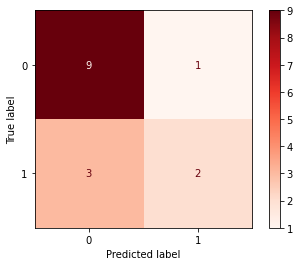

In [274]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)

Confusion matrix:

- When the actual answer was No (0), the model was right 9/10 times
- When the actual answer was Yes (1), the model was right 2/5 times

In [281]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                  index = X_train.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances = feature_importances.reset_index()
feature_importances

,importance
num_of_units,0.281231
max_screentime,0.195367
commute_time_mins,0.183006
personality_rating,0.125775
more_distracted_at_home?,0.112960
major,0.052038
labs?,0.040976
easy_internet?,0.008646
